<a href="https://colab.research.google.com/github/tesyaeriana/Kecerdasan-Buatan/blob/main/Uts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TESYA ERIANA/28**

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [142]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

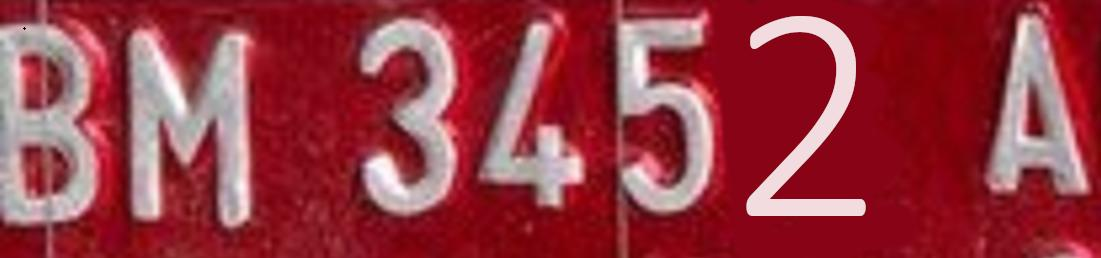

In [239]:
# Load Gambar
img1 = cv2.imread('/content/drive/MyDrive/pcvk/BM3452A_PNG.rf.0f77ba0375f050d4cdd9b8a36c7ab92b.jpg')
# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img1) # khusus google colab karena ada issue

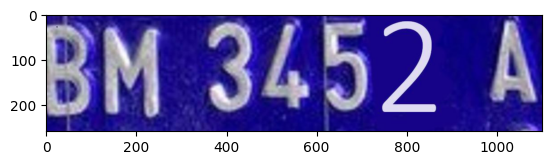

In [240]:
#devault cv2 yaitu bgr
plt.imshow(img1)

In [241]:
# convert bgr to rgb
img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

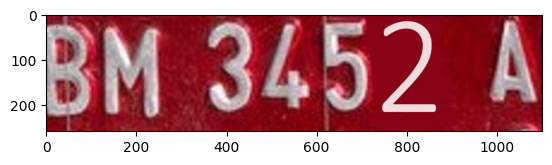

In [242]:
plt.imshow(img)

In [243]:
print(img.dtype)#melihat tipe dan ukuran dari citra
h, w, ch= img.shape
print(h)
print(w)
print(ch)

uint8
258
1101
3


In [245]:
img

array([[[116,  21,  25],
        [117,  22,  26],
        [117,  22,  26],
        ...,
        [121,   8,  26],
        [121,   8,  26],
        [123,   7,  26]],

       [[117,  21,  25],
        [117,  21,  25],
        [118,  22,  26],
        ...,
        [121,   8,  26],
        [121,   8,  26],
        [123,   7,  26]],

       [[118,  19,  24],
        [118,  19,  24],
        [119,  20,  25],
        ...,
        [120,   7,  25],
        [120,   7,  25],
        [122,   6,  25]],

       ...,

       [[130,   4,  16],
        [130,   4,  16],
        [130,   4,  16],
        ...,
        [184,  28,  50],
        [183,  27,  48],
        [181,  28,  46]],

       [[131,   6,  20],
        [131,   6,  20],
        [131,   6,  20],
        ...,
        [188,  32,  54],
        [187,  31,  52],
        [185,  32,  50]],

       [[129,   7,  22],
        [129,   7,  22],
        [131,   6,  22],
        ...,
        [188,  32,  54],
        [187,  31,  52],
        [185,  32,  50]]

In [246]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(284058, 3)

In [247]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

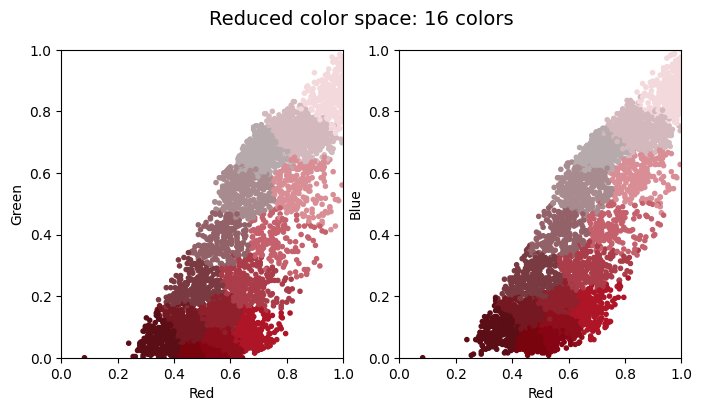

In [248]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

In [249]:
#convert int menjadi float
Z = np.float32(data)

In [250]:
print(Z.dtype, Z.shape)

float32 (284058, 3)


In [251]:
#menentukan nilai k
kriteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)
k=2
ret, label, center = cv2.kmeans(Z,k,None,kriteria,10,cv2.KMEANS_RANDOM_CENTERS)

In [252]:
print(label)

[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [253]:
print(center)

[[0.7921133  0.6869249  0.6999982 ]
 [0.52942395 0.07425333 0.1246453 ]]


In [254]:
segmented_data = center[label.flatten()]
segmented_data

array([[0.52942395, 0.07425333, 0.1246453 ],
       [0.52942395, 0.07425333, 0.1246453 ],
       [0.52942395, 0.07425333, 0.1246453 ],
       ...,
       [0.52942395, 0.07425333, 0.1246453 ],
       [0.52942395, 0.07425333, 0.1246453 ],
       [0.52942395, 0.07425333, 0.1246453 ]], dtype=float32)

In [259]:
segmented_image = segmented_data.reshape((img.shape))
segmented_image

array([[[0.52942395, 0.07425333, 0.1246453 ],
        [0.52942395, 0.07425333, 0.1246453 ],
        [0.52942395, 0.07425333, 0.1246453 ],
        ...,
        [0.52942395, 0.07425333, 0.1246453 ],
        [0.52942395, 0.07425333, 0.1246453 ],
        [0.52942395, 0.07425333, 0.1246453 ]],

       [[0.52942395, 0.07425333, 0.1246453 ],
        [0.52942395, 0.07425333, 0.1246453 ],
        [0.52942395, 0.07425333, 0.1246453 ],
        ...,
        [0.52942395, 0.07425333, 0.1246453 ],
        [0.52942395, 0.07425333, 0.1246453 ],
        [0.52942395, 0.07425333, 0.1246453 ]],

       [[0.52942395, 0.07425333, 0.1246453 ],
        [0.52942395, 0.07425333, 0.1246453 ],
        [0.52942395, 0.07425333, 0.1246453 ],
        ...,
        [0.52942395, 0.07425333, 0.1246453 ],
        [0.52942395, 0.07425333, 0.1246453 ],
        [0.52942395, 0.07425333, 0.1246453 ]],

       ...,

       [[0.52942395, 0.07425333, 0.1246453 ],
        [0.52942395, 0.07425333, 0.1246453 ],
        [0.52942395, 0

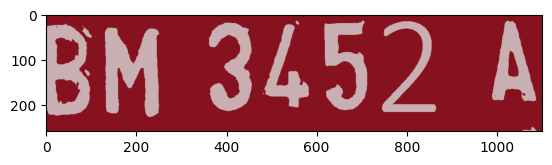

In [260]:
plt.imshow(segmented_image)

Text(0.5, 1.0, '2-color Image')

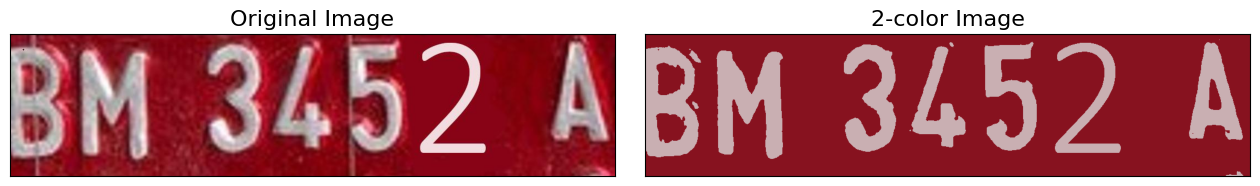

In [261]:
img_recolored = new_colors.reshape(img1.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(segmented_image)
ax[1].set_title('2-color Image', size=16)